# Hierarchical Clustering

Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters by recursively partitioning the data into smaller and smaller clusters. The algorithm starts by treating each data point as a separate cluster and then merges the closest clusters until all the data points belong to a single cluster. The result is a dendrogram, which is a tree-like diagram that shows the hierarchical relationships between the clusters.

## How it is used

Hierarchical clustering is a useful clustering method for datasets with a hierarchical structure or when the number of clusters is not known in advance. It can be used for exploratory data analysis, as it provides a visual representation of the clustering results in the form of a dendrogram. Hierarchical clustering can also be used for data preprocessing, as it can help identify outliers and noise in the data.

## Pros

- Hierarchical clustering can handle clusters of arbitrary shape and size.
- Hierarchical clustering provides a visual representation of the clustering results in the form of a dendrogram.
- Hierarchical clustering does not require the number of clusters to be specified in advance.
- Hierarchical clustering can be used for exploratory data analysis.

## Cons

- Hierarchical clustering can be computationally expensive for large datasets.
- Hierarchical clustering is sensitive to the choice of distance metric and linkage method.
- Hierarchical clustering can suffer from the "chaining" effect, where clusters are merged together even if they are not very similar.
- Hierarchical clustering can be difficult to interpret when the dendrogram is complex.

Overall, hierarchical clustering is a useful clustering method for datasets with a hierarchical structure or when the number of clusters is not known in advance. However, it may not be the best choice for large datasets or datasets with complex structures.



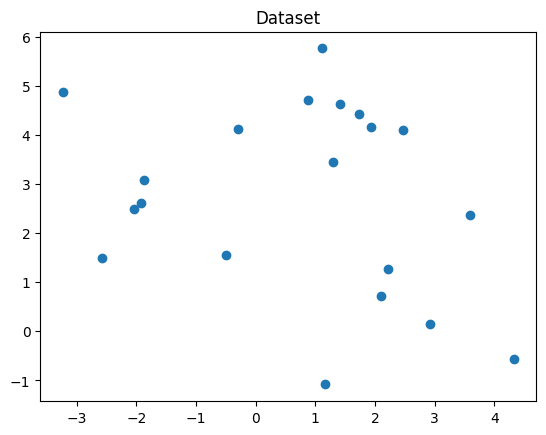

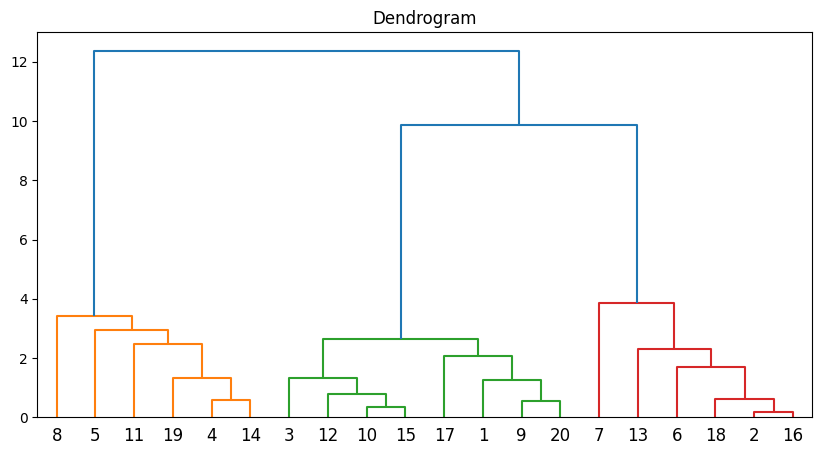

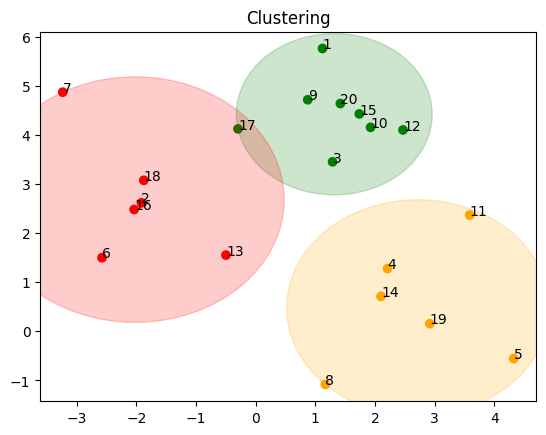

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from matplotlib.patches import Circle
from sklearn.datasets import make_blobs

# Generate random dataset
X, y = make_blobs(n_samples=20, centers=3, cluster_std=1.0, random_state=0)
clusters = linkage(X, method='ward')
cut_clusters = fcluster(clusters, 4, criterion='distance')

# Plot dataset
plt.scatter(X[:,0], X[:,1])
plt.title("Dataset")
plt.show()
colors = ['orange', 'green', 'red']
cluster_colors = [colors[label-1] for label in cut_clusters]

# Plot clustering with background color and labels
plt.scatter(X[:,0], X[:,1], c=cluster_colors)
for i, (x, y) in enumerate(X):
    if cut_clusters[i] == 1:
        plt.annotate(str(i+1), (x, y))
    elif cut_clusters[i] == 2:
        plt.annotate(str(i+1), (x, y))
    elif cut_clusters[i] == 3:
        plt.annotate(str(i+1), (x, y))
plt.title("Clustering")

# Add circles around each cluster with transparent color
for i in range(1, 4):
    cluster_points = X[cut_clusters == i]
    if len(cluster_points) > 0:
        x_center = np.mean(cluster_points[:,0])
        y_center = np.mean(cluster_points[:,1])
        radius = np.max(np.linalg.norm(cluster_points - [x_center, y_center], axis=1))
        circle = Circle((x_center, y_center), radius, color=colors[i-1], alpha=0.2)
        plt.gca().add_artist(circle)

plt.show()



# Plot dendrogram with leaf labels
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
dendrogram(clusters, leaf_label_func=lambda i: str(i+1))
plt.show()




# Assign a different color to each cluster
colors = ['orange', 'green', 'red']
cluster_colors = [colors[label-1] for label in cut_clusters]

# Plot clustering with background color and labels
plt.scatter(X[:,0], X[:,1], c=cluster_colors)
for i, (x, y) in enumerate(X):
    if cut_clusters[i] == 1:
        plt.annotate(str(i+1), (x, y))
    elif cut_clusters[i] == 2:
        plt.annotate(str(i+1), (x, y))
    elif cut_clusters[i] == 3:
        plt.annotate(str(i+1), (x, y))
plt.title("Clustering")

# Add circles around each cluster with transparent color
for i in range(1, 4):
    cluster_points = X[cut_clusters == i]
    if len(cluster_points) > 0:
        x_center = np.mean(cluster_points[:,0])
        y_center = np.mean(cluster_points[:,1])
        radius = np.max(np.linalg.norm(cluster_points - [x_center, y_center], axis=1))
        circle = Circle((x_center, y_center), radius, color=colors[i-1], alpha=0.2)
        plt.gca().add_artist(circle)

plt.show()

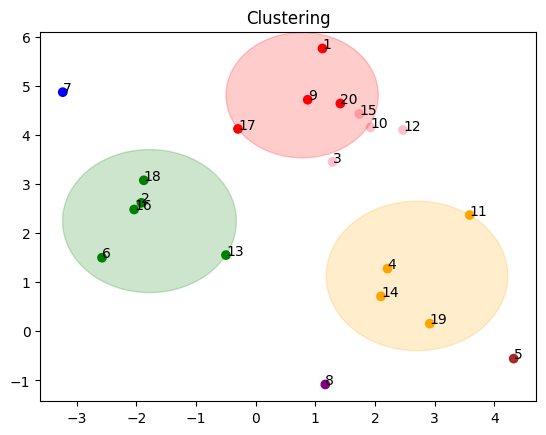

In [19]:
# Perform hierarchical clustering with 4 clusters
clustering = AgglomerativeClustering(n_clusters=7, linkage='ward')
clustering.fit(X)

# Assign a different color to each cluster
colors = ['orange', 'green', 'red', 'blue', 'purple', 'brown', 'pink']
cluster_colors = [colors[label] for label in clustering.labels_]

# Plot clustering with background color and labels
plt.scatter(X[:,0], X[:,1], c=cluster_colors)
for i, (x, y) in enumerate(X):
    plt.annotate(str(i+1), (x, y))
plt.title("Clustering")

# Add circles around each cluster with transparent color
for i in range(4):
    cluster_points = X[clustering.labels_ == i]
    if len(cluster_points) > 0:
        x_center = np.mean(cluster_points[:,0])
        y_center = np.mean(cluster_points[:,1])
        radius = np.max(np.linalg.norm(cluster_points - [x_center, y_center], axis=1))
        circle = Circle((x_center, y_center), radius, color=colors[i], alpha=0.2)
        plt.gca().add_artist(circle)

plt.show()

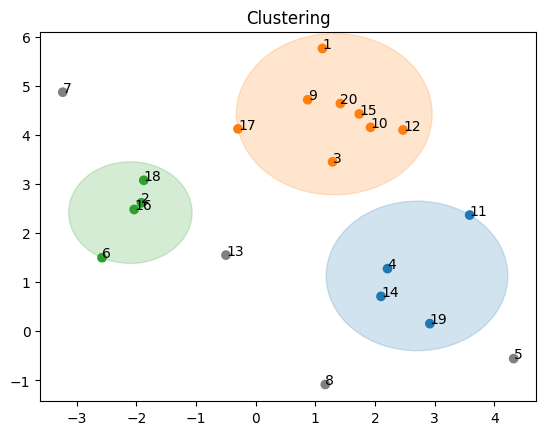

In [24]:
import seaborn as sns
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
cut_clusters = clusterer.fit_predict(X)
# Assign a different color to each cluster
palette = sns.color_palette(None, np.unique(cut_clusters).max()+1)
cluster_colors = [palette[label] if label >= 0 else (0.5, 0.5, 0.5) for label in cut_clusters]

# Plot clustering with background color and labels
plt.scatter(X[:,0], X[:,1], c=cluster_colors)
for i, (x, y) in enumerate(X):
    plt.annotate(str(i+1), (x, y))
plt.title("Clustering")

# Add circles around each cluster with transparent color
for i in np.unique(cut_clusters):
    if i == -1:
        continue
    cluster_points = X[cut_clusters == i]
    if len(cluster_points) > 0:
        x_center = np.mean(cluster_points[:,0])
        y_center = np.mean(cluster_points[:,1])
        radius = np.max(np.linalg.norm(cluster_points - [x_center, y_center], axis=1))
        circle = Circle((x_center, y_center), radius, color=palette[i], alpha=0.2)
        plt.gca().add_artist(circle)

plt.show()

<Axes: ylabel='$\\lambda$ value'>

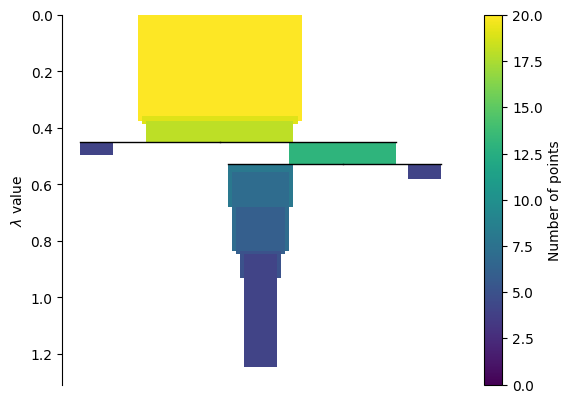

In [12]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='distance'>

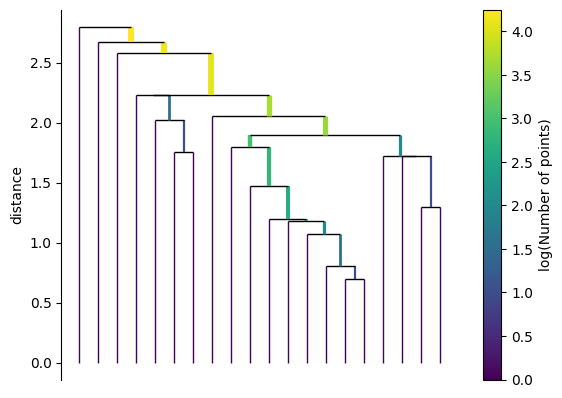

In [14]:
clusterer.single_linkage_tree_.plot()

<Axes: >

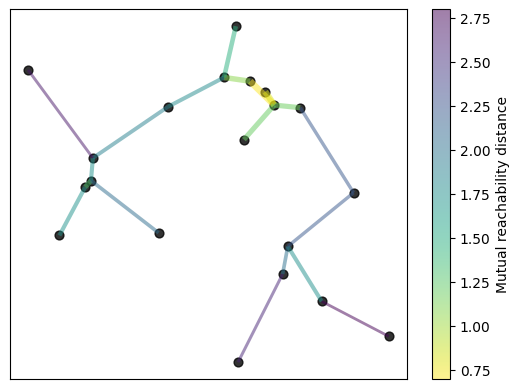

In [25]:

clusterer.minimum_spanning_tree_.plot()